<a href="https://colab.research.google.com/github/bani1610/Machine-Learning-Praktikum/blob/main/Praktikum10/Notebook/Tugas1%2C2%2C3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TUGAS KE 1

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
data = {
    "Suhu": [10, 25, 15, 20, 18, 20, 22, 24],
    "Angin": [0, 0, 5, 3, 7, 10, 5, 6],
    "Persepsi": ["Dingin", "Panas", "Dingin", "Panas", "Dingin", "Dingin", "Panas", "Panas"]
}

In [ ]:
df = pd.DataFrame(data)
print("Data Training:\n", df)

Data Training:
    Suhu  Angin Persepsi
0    10      0   Dingin
1    25      0    Panas
2    15      5   Dingin
3    20      3    Panas
4    18      7   Dingin
5    20     10   Dingin
6    22      5    Panas
7    24      6    Panas


In [ ]:
X = df[["Suhu", "Angin"]]
y = df["Persepsi"]

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
test_data = np.array([[16, 3]])
prediction = knn.predict(test_data)

print("\nPrediksi untuk suhu 16°C dan angin 3 km/jam:")
print("==>", prediction[0])


Prediksi untuk suhu 16°C dan angin 3 km/jam:
==> Dingin


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


# TUGAS KE 2

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

In [ ]:
# Data dari soal
data = {
    'Hasil_Sebenarnya': ['Lulus', 'Lulus', 'Lulus', 'Lulus', 'Lulus',
                         'Tidak Lulus', 'Tidak Lulus', 'Tidak Lulus', 'Tidak Lulus', 'Tidak Lulus'],
    'Hasil_Prediksi': ['Lulus', 'Lulus', 'Lulus', 'Tidak Lulus', 'Tidak Lulus',
                       'Lulus', 'Tidak Lulus', 'Tidak Lulus', 'Tidak Lulus', 'Tidak Lulus']
}

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df['Actual'] = df['Hasil_Sebenarnya'].map({'Lulus':1, 'Tidak Lulus':0})
df['Pred'] = df['Hasil_Prediksi'].map({'Lulus':1, 'Tidak Lulus':0})

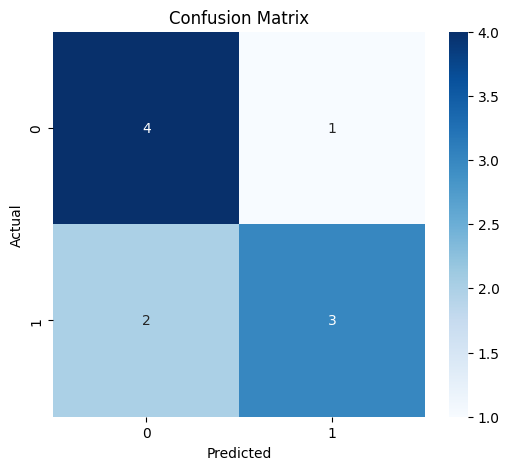

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# Metrics
acc = accuracy_score(df['Actual'], df['Pred'])
prec = precision_score(df['Actual'], df['Pred'])
rec = recall_score(df['Actual'], df['Pred'])

print("\nAccuracy :", round(acc*100,2), "%")
print("Precision:", round(prec*100,2), "%")
print("Recall   :", round(rec*100,2), "%")


Accuracy : 70.0 %
Precision: 75.0 %
Recall   : 60.0 %


# TUGAS KE 3

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
df = pd.read_csv('/content/drive/MyDrive/praktikum-ml/Praktikum10/data/weather_classification_data.csv')
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [10]:
print("Dataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())
print("\nTarget variable distribution:")
print(df['Weather Type'].value_counts())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB
None

First 5 rows:
   Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0         14.0        73         9.5               82.0  p

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
Temperature,0
Humidity,0
Wind Speed,0
Precipitation (%),0
Cloud Cover,0
Atmospheric Pressure,0
UV Index,0
Season,0
Visibility (km),0
Location,0


In [11]:
label_encoders = {}
categorical_columns = ['Cloud Cover', 'Season', 'Location', 'Weather Type']

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    print(f"\n{col} encoding: {dict(zip(le.classes_, le.transform(le.classes_)))}")


Cloud Cover encoding: {'clear': np.int64(0), 'cloudy': np.int64(1), 'overcast': np.int64(2), 'partly cloudy': np.int64(3)}

Season encoding: {'Autumn': np.int64(0), 'Spring': np.int64(1), 'Summer': np.int64(2), 'Winter': np.int64(3)}

Location encoding: {'coastal': np.int64(0), 'inland': np.int64(1), 'mountain': np.int64(2)}

Weather Type encoding: {'Cloudy': np.int64(0), 'Rainy': np.int64(1), 'Snowy': np.int64(2), 'Sunny': np.int64(3)}


In [12]:
X = df.drop("Weather Type", axis=1)
y = df["Weather Type"]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

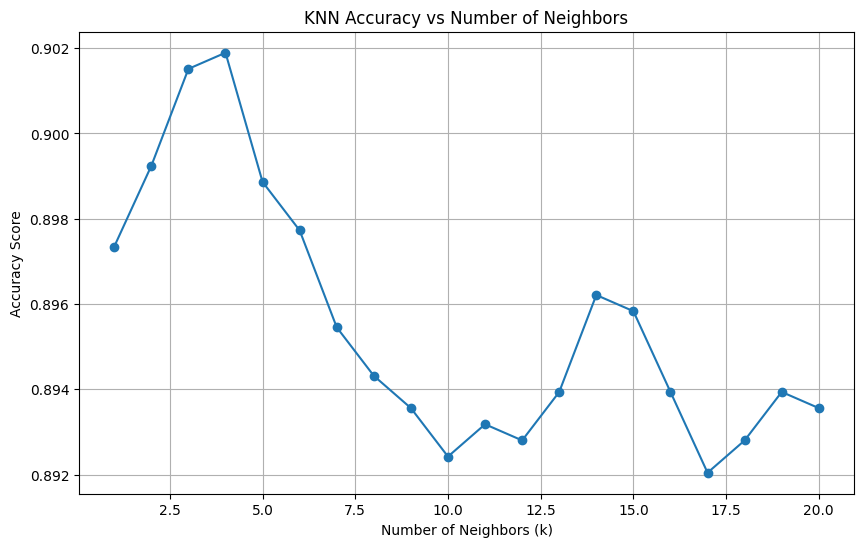

Optimal k: 4 with accuracy: 0.9019


In [15]:
def find_optimal_k(X_train, X_test, y_train, y_test, max_k=20):
    k_values = range(1, max_k + 1)
    accuracy_scores = []

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append(accuracy)

    # Plot accuracy vs k
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, accuracy_scores, marker='o')
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel('Accuracy Score')
    plt.title('KNN Accuracy vs Number of Neighbors')
    plt.grid(True)
    plt.show()

    best_k = k_values[np.argmax(accuracy_scores)]
    best_accuracy = max(accuracy_scores)

    print(f"Optimal k: {best_k} with accuracy: {best_accuracy:.4f}")
    return best_k, best_accuracy

# Find optimal k
optimal_k, optimal_accuracy = find_optimal_k(X_train_scaled, X_test_scaled, y_train, y_test)

In [16]:
knn_model = KNeighborsClassifier(n_neighbors=optimal_k)
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=4)

In [17]:
y_pred = knn_model.predict(X_test_scaled)

In [18]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nFinal Model Accuracy: {accuracy:.4f}")


Final Model Accuracy: 0.9019


In [19]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoders['Weather Type'].classes_))


Classification Report:
              precision    recall  f1-score   support

      Cloudy       0.84      0.91      0.87       660
       Rainy       0.88      0.90      0.89       660
       Snowy       0.95      0.92      0.93       660
       Sunny       0.94      0.89      0.91       660

    accuracy                           0.90      2640
   macro avg       0.90      0.90      0.90      2640
weighted avg       0.90      0.90      0.90      2640



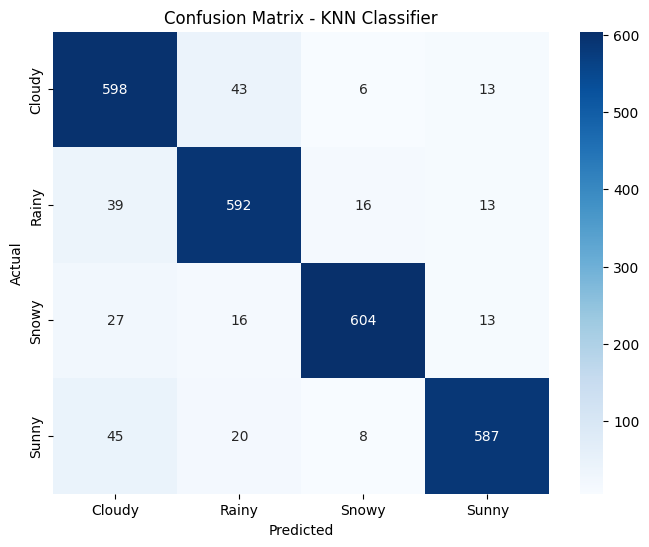

In [20]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
           xticklabels=label_encoders['Weather Type'].classes_,
           yticklabels=label_encoders['Weather Type'].classes_)
plt.title('Confusion Matrix - KNN Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()